### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the synthetic dataset
df = pd.read_csv('synthetic_hr_data.csv')

### 1. Initial Inspection

In [4]:
df.head()

,EmployeeID,Age,TenureMonths,PerformanceRating,EngagementScore,SalaryUSD,PromotionsLastYear,YearsSinceLastPromotion,WorkLifeBalance,OverTime,DistanceFromHome,HasStockOptions,JobSatisfactionScore,CultureAlignmentScore,Department,JobRole,Attrition
0,1,50,99,3.0,7.0,99638,0,3,4.0,No,22,0,9.0,4,People,People Partner,Yes
1,2,36,3,NaN,3.0,114072,0,0,3.0,Yes,50,0,2.0,1,Product,Product Manager,No
2,3,29,22,3.0,1.0,112309,0,0,4.0,Yes,48,0,9.0,4,Growth,Growth Analyst,No
3,4,42,4,4.0,4.0,169724,0,0,2.0,Yes,53,1,8.0,8,Growth,Growth Analyst,No
4,5,40,20,3.0,6.0,172843,0,0,2.0,No,59,0,9.0,8,Finance,Controller,No


In [5]:
#Data Info and Missing Values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               2500 non-null   int64  
 1   Age                      2500 non-null   int64  
 2   TenureMonths             2500 non-null   int64  
 3   PerformanceRating        2425 non-null   float64
 4   EngagementScore          2425 non-null   float64
 5   SalaryUSD                2500 non-null   int64  
 6   PromotionsLastYear       2500 non-null   int64  
 7   YearsSinceLastPromotion  2500 non-null   int64  
 8   WorkLifeBalance          2425 non-null   float64
 9   OverTime                 2500 non-null   object 
 10  DistanceFromHome         2500 non-null   int64  
 11  HasStockOptions          2500 non-null   int64  
 12  JobSatisfactionScore     2425 non-null   float64
 13  CultureAlignmentScore    2500 non-null   int64  
 14  Department              

### 2. Summary Statistics

In [6]:
df.describe()

,EmployeeID,Age,TenureMonths,PerformanceRating,EngagementScore,SalaryUSD,PromotionsLastYear,YearsSinceLastPromotion,WorkLifeBalance,DistanceFromHome,HasStockOptions,JobSatisfactionScore,CultureAlignmentScore
count,2500.00000,2500.000000,2500.000000,2425.000000,2425.000000,2500.000000,2500.000000,2500.000000,2425.000000,2500.000000,2500.000000,2425.000000,2500.000000
mean,1250.50000,38.165600,13.476800,3.326186,5.572371,112097.832400,0.141200,1.334400,2.916701,29.375200,0.414800,5.573608,5.596000
std,721.83216,9.572358,11.764796,1.021426,2.871674,39590.382909,0.419205,2.020547,0.795297,16.714179,0.492786,2.830549,2.869578
min,1.00000,22.000000,2.000000,1.000000,1.000000,45005.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,625.75000,30.000000,5.000000,3.000000,3.000000,76974.750000,0.000000,0.000000,2.000000,15.000000,0.000000,3.000000,3.000000
50%,1250.50000,38.000000,10.000000,3.000000,6.000000,112582.500000,0.000000,0.000000,3.000000,29.000000,0.000000,6.000000,6.000000
75%,1875.25000,46.000000,18.000000,4.000000,8.000000,146146.250000,0.000000,3.000000,3.000000,43.000000,1.000000,8.000000,8.000000
max,2500.00000,54.000000,99.000000,5.000000,10.000000,179974.000000,2.000000,6.000000,4.000000,59.000000,1.000000,10.000000,10.000000


### Value Counts for Categorical Features

In [9]:
for col in ['Department', 'JobRole', 'OverTime', 'Attrition', 'HasStockOptions']:
    print(f"\n{col}:\n{df[col].value_counts()}")


Department:
Department
Operations          304
Growth              296
Tech                288
Marketing           282
Legal               280
Product             275
People              272
Customer Support    253
Finance             250
Name: count, dtype: int64

JobRole:
JobRole
Growth Analyst              169
Legal Counsel               149
Team Lead                   143
Product Manager             141
Paralegal                   131
BizDev Manager              127
Customer Support Agent      110
UI/UX Designer              108
Operations Manager          105
Risk Analyst                101
Logistics Coordinator        98
Product Analyst              86
People Partner               79
Content Creator              79
Marketing Specialist         72
Recruiter                    71
DevOps Engineer              68
Growth Marketing Analyst     66
Social Media Manager         65
Compliance Officer           65
Controller                   65
Accountant                   62
Data Analyst

### 3. Univariate & Bivariate Analysis

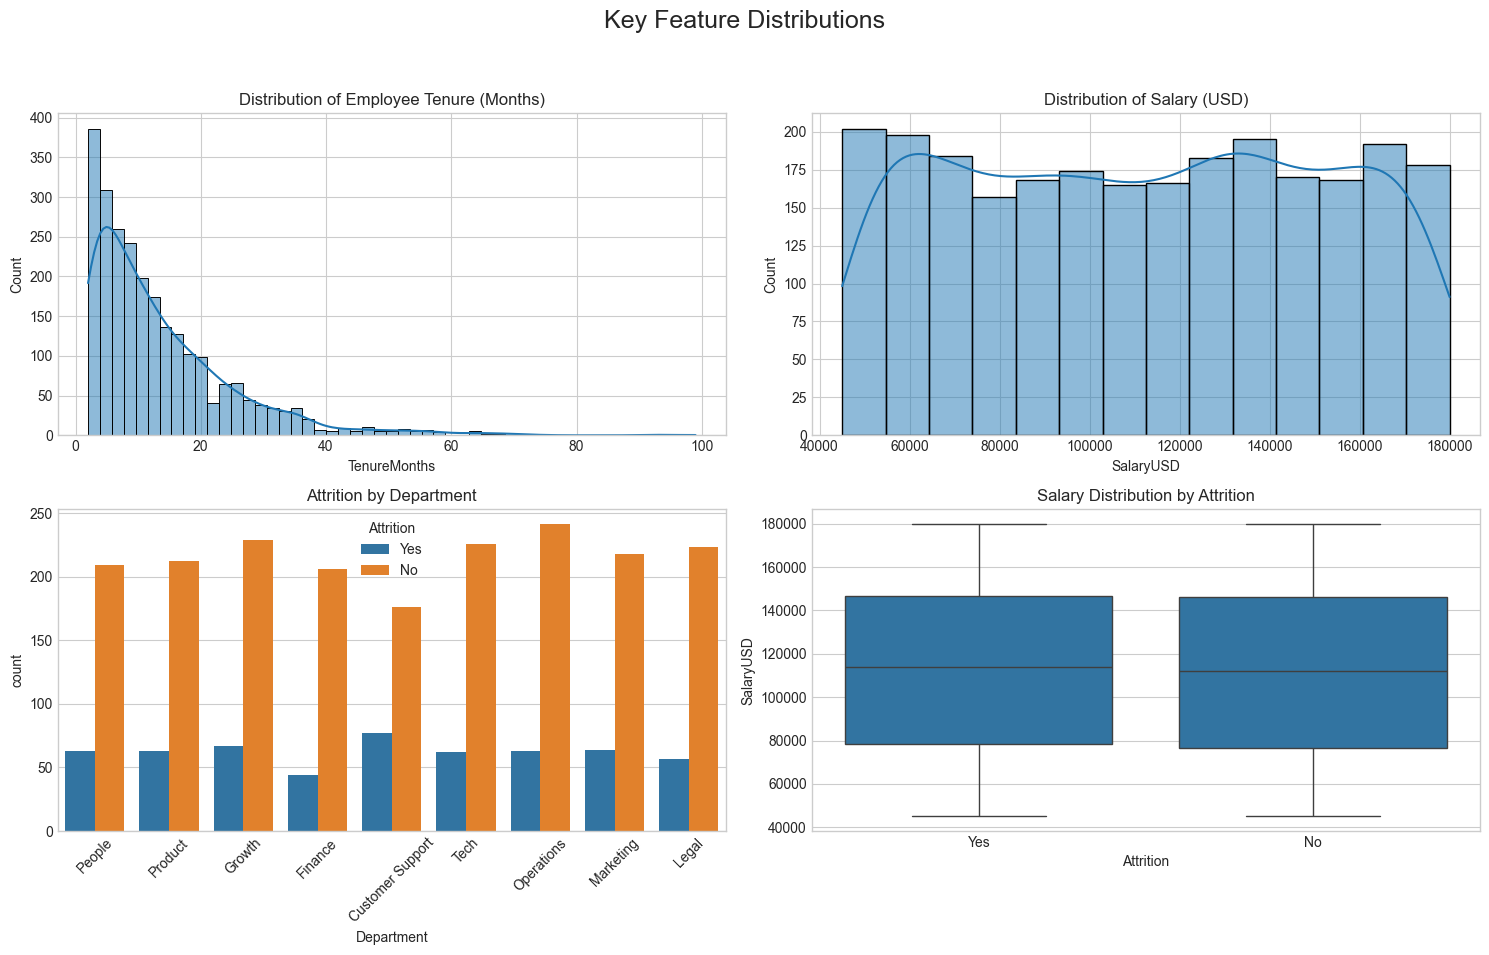

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Feature Distributions', fontsize=18)

# Histogram for TenureMonths
sns.histplot(df['TenureMonths'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Employee Tenure (Months)')

# Histogram for SalaryUSD
sns.histplot(df['SalaryUSD'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Salary (USD)')

# Bar plot of Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition', ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Department')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot of Salary by Attrition
sns.boxplot(data=df, x='Attrition', y='SalaryUSD', ax=axes[1, 1])
axes[1, 1].set_title('Salary Distribution by Attrition')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 4. Correlation Analysis

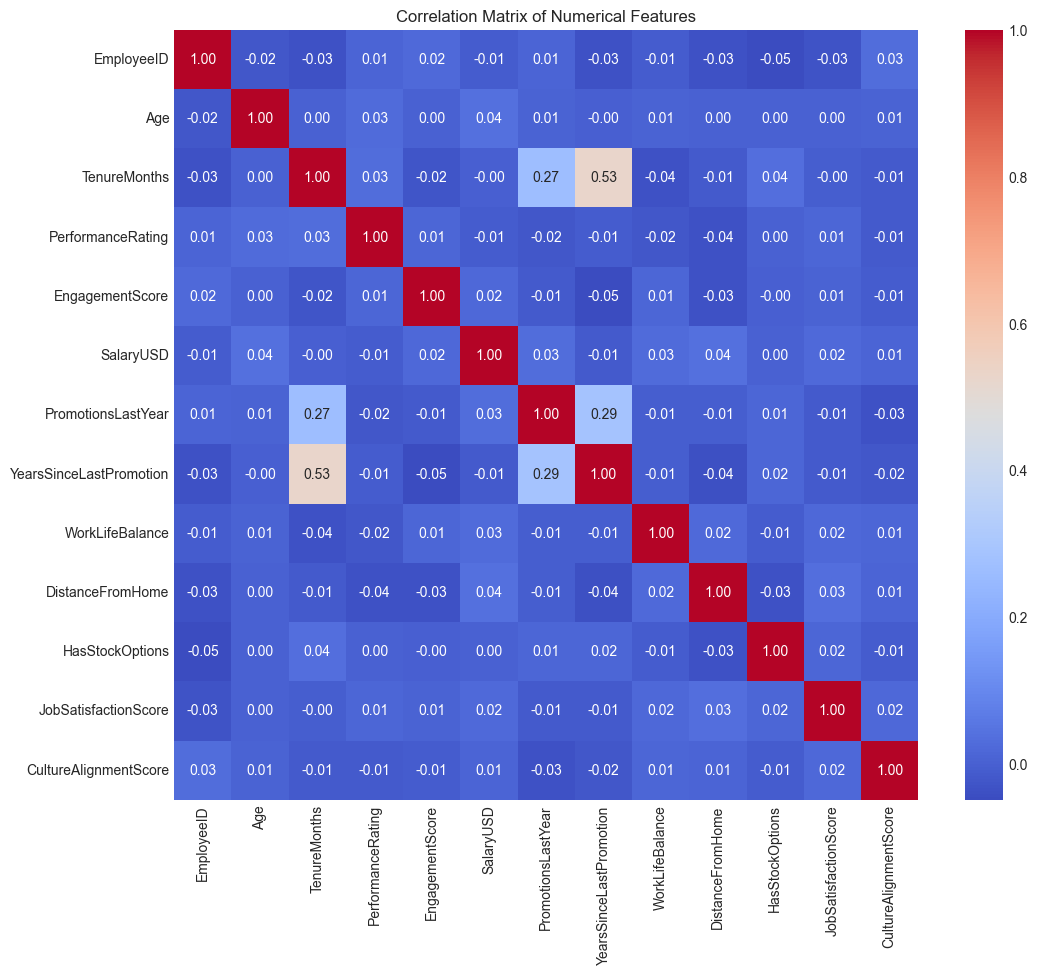

In [14]:
#Correlation Matrix of Numerical Features
import numpy as np

# Drop categorical and ID columns, then calculate correlation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()